# **Entrega 3 - Aprendizaje de máquinas**


## **Ejercicio 1 - $k$-Means (C = 1.0)**

Implemente el algoritmo de $k$-Means para agrupar el subconjunto de datos ```train_data```. Hecho esto, valide con el subconjunto ```test_data```. Para determinar el número correcto de clusters, use el análisis por el método del codo y de la silueta, de tal manera que encuentre la mejor combinación de parámetros para $k$-Means que le permita obtener el mejor desempeño. Al final, justifique a través de un párrafo corto su elección de parámetros.

**NOTA:** Los datos se generarán de acuerdo a su número se CC. Por favor, ingrese su número en la línea indicada.

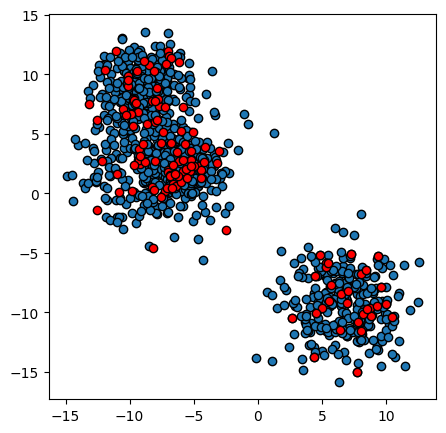

In [ ]:
#@markdown ------
#@markdown #### **⚠️ Ingrese su número de CC**. ⬇

!gdown -qq "https://drive.google.com/uc?id=1_aBCW63crUL_mPwE8ATzCtsjNa5rRiUL" -O /eval_tools-1.1-py3-none-any.whl
!pip3 -qq install /eval_tools-1.1-py3-none-any.whl
!rm -r /eval_tools-1.1-py3-none-any.whl

import matplotlib.pyplot as plt
from eval_tools import import_data_from_CC

CC = 1001470137 #@param {type:"number"}

train_data, test_data, _, _ = import_data_from_CC (CC)

_, axes = plt.subplots(figsize=(5,5))
axes.scatter(train_data[:, 0], train_data[:, 1], edgecolors='k')
axes.scatter(test_data[:, 0], test_data[:, 1], c='r', edgecolors='k')

#@markdown ------

Verifique las variables ```train_data```, ```test_data```

In [ ]:
print (train_data.shape, test_data.shape)

(1200, 2) (120, 2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [ ]:
# Create a distance function
def euclidean_distance(pt1, pt2):
  assert len(pt1) == 2, "Error! No 2d point"
  assert len(pt2) == 2, "Error! No 2d point"
  return (pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2

In [ ]:
# Define num of clusters
clusters = [ 2, 3, 4, 5, 6, 7, 8, 9 ]

elbow_distances = []
silhouette_distances = []

# Eval kmeans over each num of clusters
for cluster in clusters :
  kmeans = KMeans(n_clusters = cluster)
  kmeans.fit( train_data )

  centroides = kmeans.cluster_centers_
  predictions = kmeans.predict( test_data )

  distanceSilhouette = silhouette_score( test_data , predictions , metric="euclidean")
  silhouette_distances.append(distanceSilhouette)
  distanceElbow = 0

  for i in range(len(test_data)) :
    centroide = centroides[predictions[i]]
    distanceElbow += euclidean_distance( centroide , test_data[i] )

  elbow_distances.append(distanceElbow/len(test_data))

print ('Elbow Distance: {0}'.format(len(elbow_distances)))
print ('Silhoette Distance: {0}'.format(len(silhouette_distances)))


Elbow Distance: 8
Silhoette Distance: 8


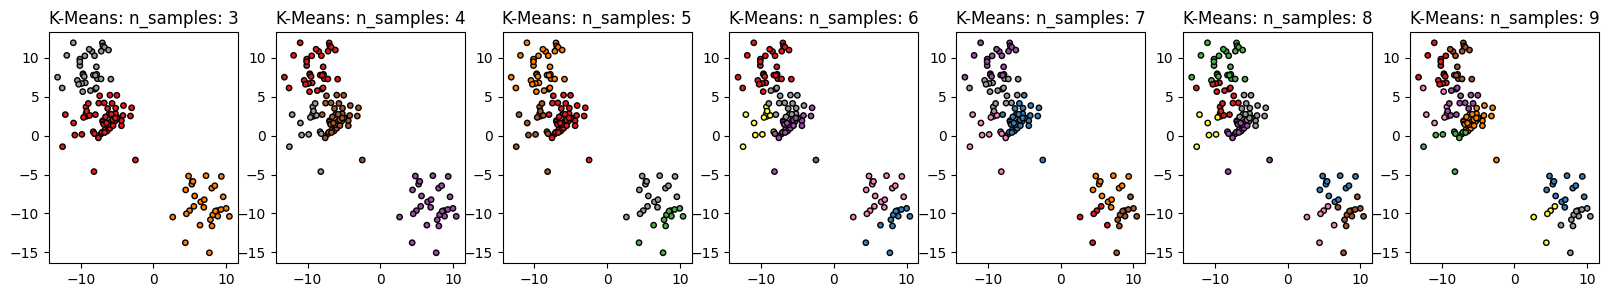

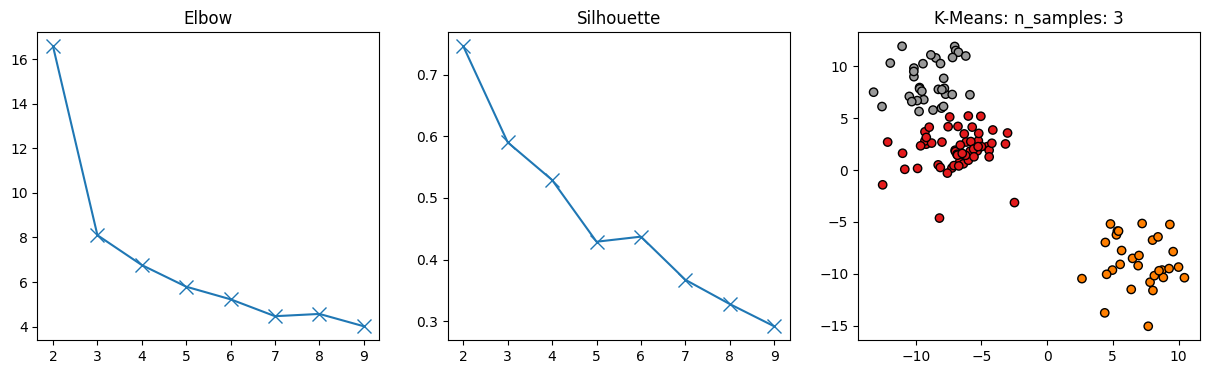

In [ ]:
# Graficar las predicciones
_, axes = plt.subplots(1,7, figsize = (20,3))
nSamples = [ 3, 4, 5, 6, 7, 8, 9 ]

# fit the models
for i, sample in enumerate(nSamples) :

    kmeans = KMeans(n_clusters = sample)
    kmeans.fit( train_data )

    # Create predictions
    predictions = kmeans.predict(test_data)

    # plot data and found centroids
    axes[i].scatter(test_data[:, 0], test_data[:, 1], c=predictions, cmap='Set1', edgecolors='k', s= 15)
    axes[i].set_title('K-Means: n_samples: {0}'.format(sample))

plt.show()

kmeans = KMeans(n_clusters = 3)
kmeans.fit( train_data )

# Create predictions
predictions = kmeans.predict(test_data)

# Plot the elbow
_, axes = plt.subplots (1, 3, figsize = (15,4))
axes[0].plot( clusters, elbow_distances , marker="x", ms=10)
axes[0].set_title("Elbow");
axes[1].plot( clusters , silhouette_distances , marker="x", ms = 10)
axes[1].set_title("Silhouette");
axes[2].scatter(test_data[:, 0], test_data[:, 1], c=predictions, cmap='Set1', edgecolors='k');
axes[2].set_title("K-Means: n_clusters: 3");


Text(0.5, 1.0, 'Silhouette')

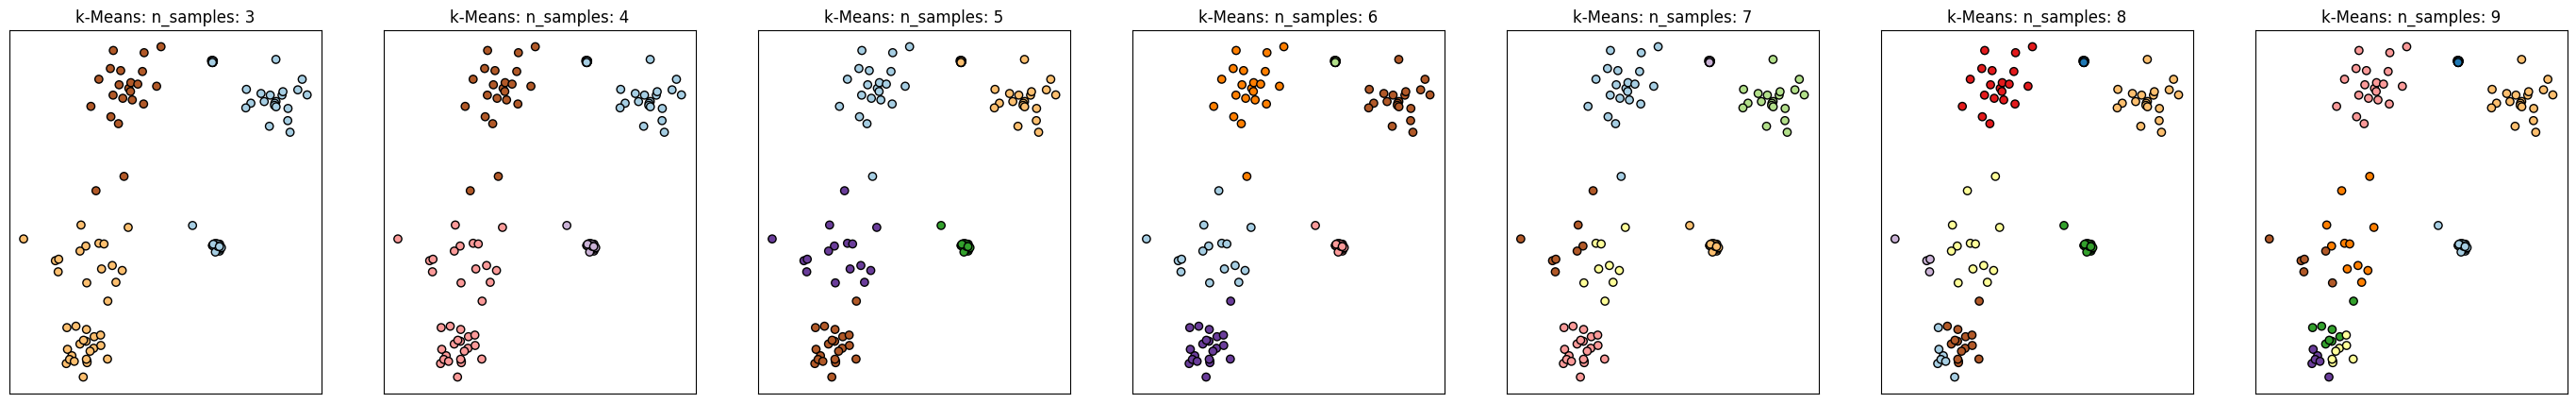

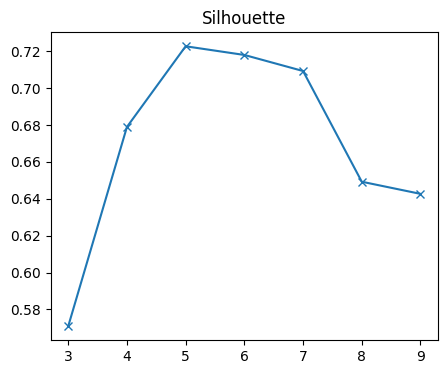

## **Ejercicio 2 - $k$-Means (C = 2.0)**

Emplee todas las columnas en la base de datos  ```dataset/customer_segmentation.csv``` para realizar clustering utilizando $k$-Means. Para esto, configure $k$-Means con la mejor selección de parámetros posible para obtener los mejores desempeños en ambos casos. Con tal fin, utilice el diagrama de silhouette y elbow; y justifique brevemente cual es el mejor modelo. Una vez determine cual es el mejor modelo, obtenga las predicciones y cree 3 diagramas de dispersión relacionando pares de variables con las predicciones estimadas.

**NOTA:** Explore pares de características diferentes en diagramas de dispersión que obtengan clusters consistentes. La idea es encontrar el par de variables en donde sea más visible la agrupación en la base de datos.

In [1]:
#@markdown ------
#@markdown #### **⚠️❗ Ejecute esta celda para descargar los archivos necesario**
#@markdown  \\
#@markdown Esta celda creará la carpeta ```dataset```, en donde encontrará la base de datos con la cual deberá trabajar.

!mkdir -p /content/dataset/
!gdown -qq "https://drive.google.com/uc?id=144HcoBuWj1D_g0HRGuqryHZ1sIN9vXeV" -O /content/dataset/customer_segmentation.csv

#@markdown ------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [3]:
X = pd.read_csv('/content/dataset/customer_segmentation.csv', delimiter= ";").values

(2000, 7) 
 (1600, 7) 
 (400, 7)


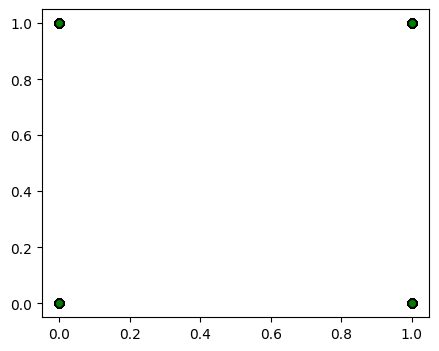

In [6]:
# Create train / test splits
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 3)

# Plot everything and print all shapes
_, ax = plt.subplots(figsize = (5,4))
ax.scatter(X_test[:,0], X_test[:,1], c = 'b', edgecolors = 'k')
ax.scatter(X_train[:,0], X_train[:,1], c = 'g', edgecolors = 'k')

print (X.shape, "\n", X_train.shape, "\n", X_test.shape)

In [7]:
clusters = [ 2,3,4,5,6,7,8 ]
silhouette_distances = []

# Eval kmeans over each num of clusters
for cluster in clusters :
  kmeans = KMeans(n_clusters = cluster )
  kmeans.fit( X_train )

  predictions = kmeans.predict( X_test )
  distance = silhouette_score( X_test , predictions , metric="euclidean")

  silhouette_distances.append(distance)

print (len(silhouette_distances))

7


Text(0.5, 1.0, 'Silhouette')

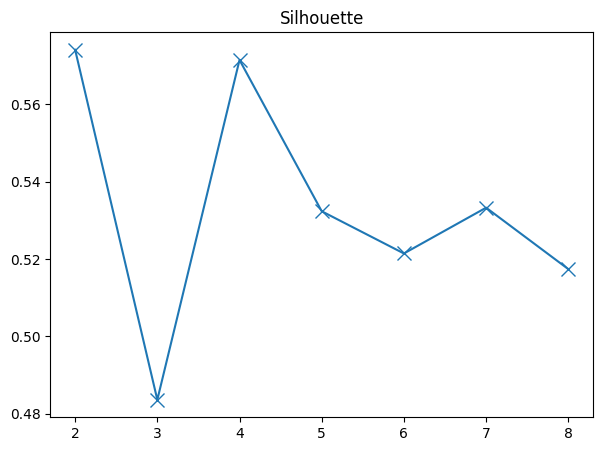

In [8]:
# Plot the silhouette
_, ax = plt.subplots (figsize = (7,5))
ax.plot( clusters , silhouette_distances , marker="x", ms=10)
ax.set_title("Silhouette")

In [9]:
# Create a distance function
def euclidean_distance(pt1, pt2):
  assert len(pt1) == len(pt2), "Points must have same dimensions"
  return sum((x - y) ** 2 for x, y in zip(pt1, pt2)) ** 0.5  # Actual Euclidean distance

In [10]:
# Define num of clusters
elbow_distances = []

# Eval kmeans over each num of clusters
for cluster in clusters :
  kmeans = KMeans(n_clusters=cluster)
  kmeans.fit(X_train)

  centroids = kmeans.cluster_centers_  # Corrected attribute name
  predictions = kmeans.predict(X_test)
  distance = 0

  for i in range(len(X_test)):
    centroid = centroids[predictions[i]]
    distance += euclidean_distance(centroid, X_test[i])

  elbow_distances.append(distance/len(X_test))

print(len(elbow_distances))

7


Text(0.5, 1.0, 'Elbow')

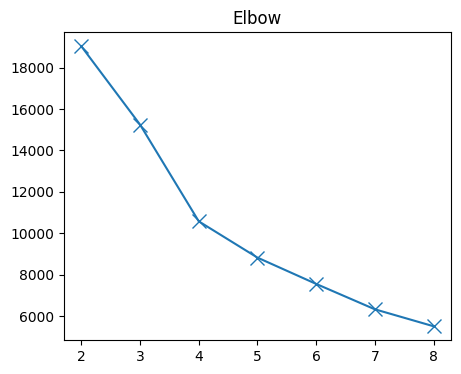

In [ ]:
# Plot the elbow
_, ax = plt.subplots (figsize = (5,4))
ax.plot( clusters , elbow_distances , marker="x", ms=10)
ax.set_title("Elbow")

## **Ejercicio 3 - $k$-Means en imágenes (C = 2.0)**


Use las siguientes imágenes para realizar segmentación semántica usando $k$-Means. \\

**NOTA:** Ejecutar la segmentación no deberá durar más que unos segundos. En caso de demorar demasiado, se le penalizará en la nota.

In [ ]:
#@markdown ------
#@markdown #### **⚠️❗ Ejecute esta celda para descargar los archivos necesario**
#@markdown  \\
#@markdown Esta celda creará la carpeta ```images_E3```, en donde encontrará las imágenes con las que deberá trabajar

!gdown -qq "https://drive.google.com/uc?id=17csEqkQPPaepgNe9mqKccZaNEah8powd" -O /sample_images.zip
!unzip -qq /sample_images.zip -d /content/images_E3/
!rm -r /sample_images.zip /content/images_E3/__MACOSX
#@markdown ------

Verifique que en el directorio ```images_E3``` se encuentran las imágenes

In [ ]:
!ls images_E3/

im_01.jpg  im_02.png  im_03.png


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

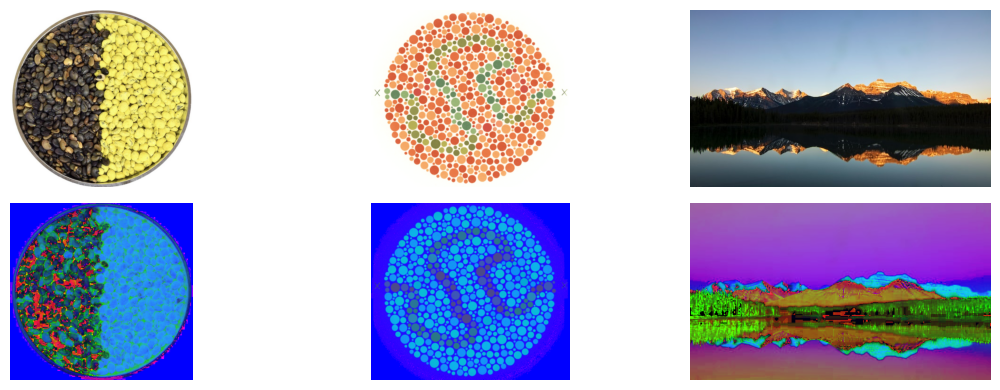

In [ ]:
original_images = []
images_RGB = []
images_HSV = []
names = []

folder_path = '/content/images_E3/'

for filename in os.listdir(folder_path):
  names.append(filename)
  original_images.append(cv2.imread(os.path.join(folder_path, filename)))

# Resize to a feasible size to avoid extensive computation
#for i,image in enumerate(original_images):
#  original_images[i] = cv2.resize(image, (128, 128))

# Convert from BGR Color Space to HSV
for image in original_images:
  images_RGB.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  images_HSV.append(cv2.cvtColor(image, cv2.COLOR_BGR2HSV_FULL))

_, axes = plt.subplots (2, 3, figsize = (12,4))
for i in range(len(original_images)):
  axes[0, i].imshow( images_RGB[i] ), axes[0, i].set_axis_off() #RGB
  axes[1, i].imshow( images_HSV[i] ), axes[1, i].set_axis_off() #HSV
plt.tight_layout()

In [ ]:
vectorized_rgb = []
vectorized_hsv = []
n_RGB = [3, 4, 3]
n_HSV = [3, 3, 5]

# Vectorize to compute kmeans
for image in images_RGB:
  vectorized = image.reshape((-1,3))
  vectorized_rgb.append(np.float32(vectorized))

for image in images_HSV:
  vectorized = image.reshape((-1,3))
  vectorized_hsv.append(np.float32(vectorized))

# Check both vector sizes
for i in range(len(original_images)):
  print(vectorized_rgb[i].shape, vectorized_hsv[i].shape)

(3271952, 3) (3271952, 3)
(499743, 3) (499743, 3)
(241920, 3) (241920, 3)


# **RGB image**

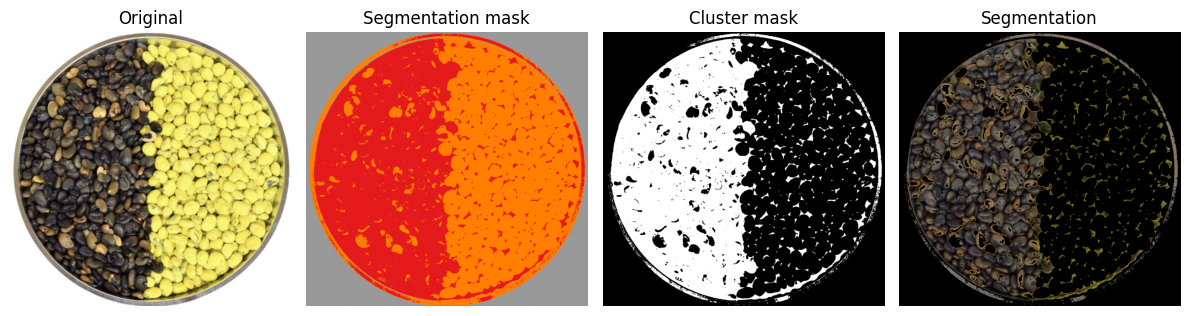

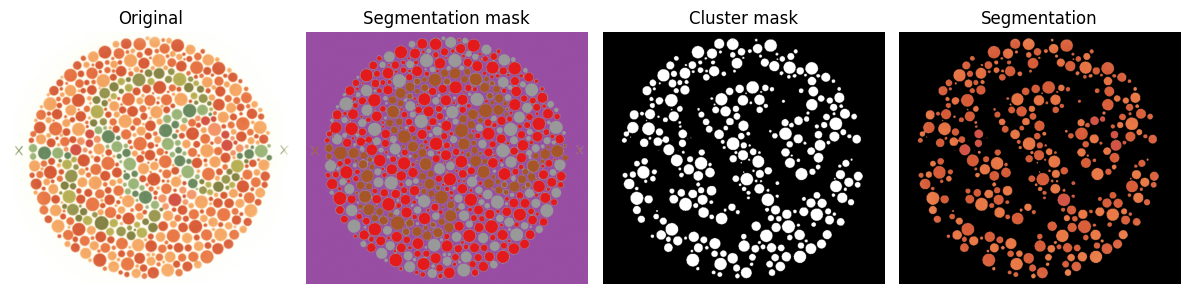

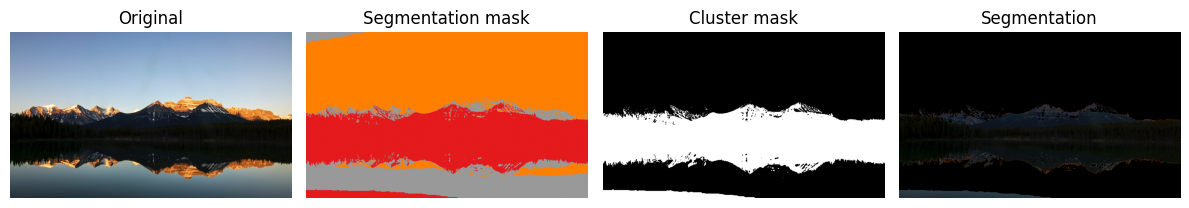

In [ ]:
clustered_rgb_list = []

for i, img_rgb in enumerate(images_RGB):
  # Train kmeans
  kmeans = KMeans(n_clusters = n_RGB[i], random_state=0)
  kmeans.fit( vectorized_rgb[i] )

  # Predict to segment regions
  clustered_rgb = kmeans.predict( vectorized_rgb[i] )
  clustered_rgb = clustered_rgb.reshape( [img_rgb.shape[0], img_rgb.shape[1]] )
  clustered_rgb_list.append( clustered_rgb )

  # Mask only the cluster number 0 (turn the rest of pixels into black)
  cluster = 0

  cluster_mask = np.array ( clustered_rgb == cluster , dtype = np.uint8)

  masked_image = np.copy(img_rgb)
  masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask)

  # Plot original and segmentation masks
  _, axes = plt.subplots (1, 4, figsize = (12,4))
  axes[0].set_title("Original"), axes[0].imshow( img_rgb ), axes[0].set_axis_off()
  axes[1].set_title("Segmentation mask"), axes[1].imshow( clustered_rgb, cmap='Set1'), axes[1].set_axis_off()
  axes[2].imshow( cluster_mask , cmap="gray"), axes[2].set_axis_off(), axes[2].set_title("Cluster mask")
  axes[3].imshow( masked_image ), axes[3].set_axis_off(), axes[3].set_title("Segmentation")
  plt.tight_layout()

# **HSV image**

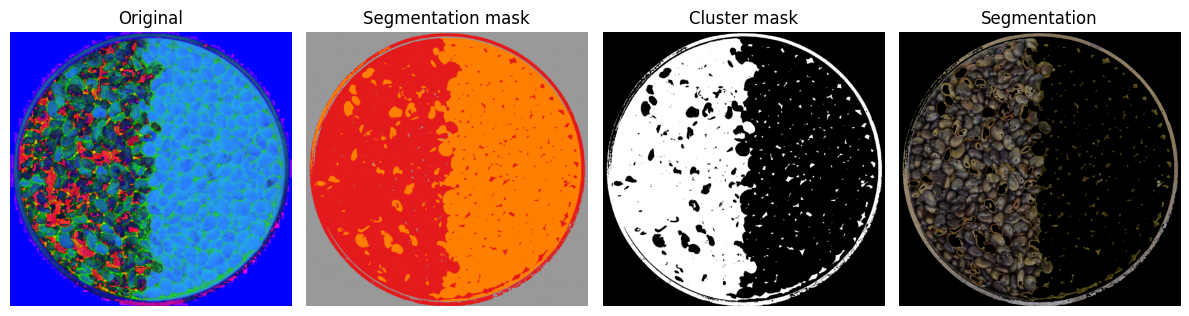

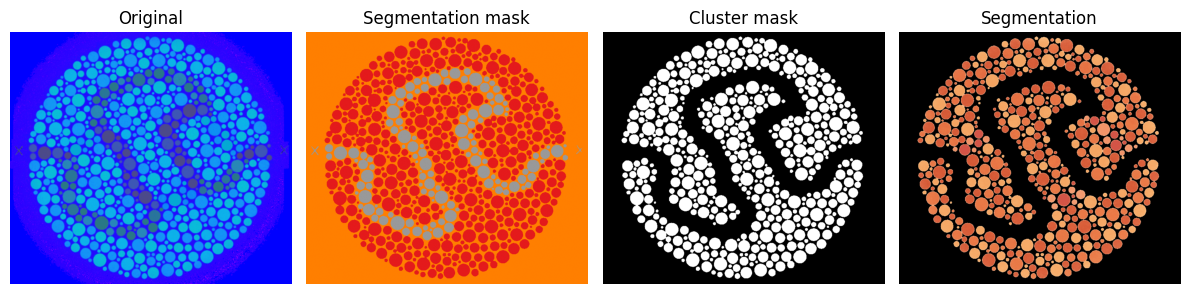

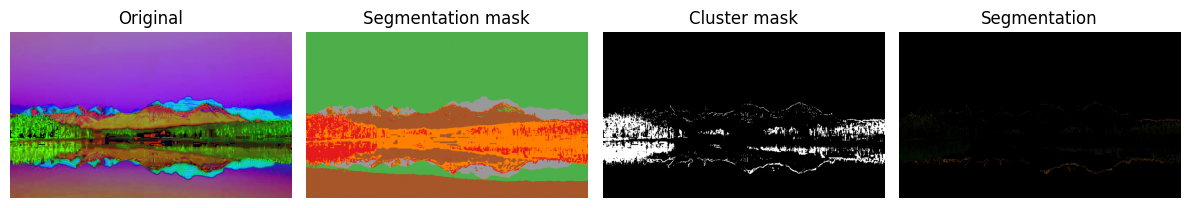

In [ ]:
clustered_hsv_list = []

for i, img_hsv in enumerate(images_HSV):

  # Train kmeans
  kmeans = KMeans(n_clusters = n_HSV[i], random_state=0).fit( vectorized_hsv[i] )

  # Predict to segment regions
  clustered_hsv = kmeans.predict( vectorized_hsv[i] )
  clustered_hsv = clustered_hsv.reshape( [img_hsv.shape[0], img_hsv.shape[1]] )
  clustered_hsv_list.append( clustered_hsv )

  # Mask only the cluster number 0 (turn the rest of pixels into black)
  cluster = 0

  cluster_mask = np.array ( clustered_hsv == cluster , dtype = np.uint8)

  masked_image = np.copy(images_RGB[i])
  masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask)

  # Plot original and segmentation masks
  _, axes = plt.subplots (1, 4, figsize = (12,4))
  axes[0].imshow( img_hsv ), axes[0].set_axis_off(), axes[0].set_title("Original")
  axes[1].imshow( clustered_hsv, cmap='Set1' ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
  axes[2].imshow( cluster_mask , cmap="gray"), axes[2].set_axis_off(), axes[2].set_title("Cluster mask")
  axes[3].imshow( masked_image ), axes[3].set_axis_off(), axes[3].set_title("Segmentation")
  plt.tight_layout()


# **Comparison**

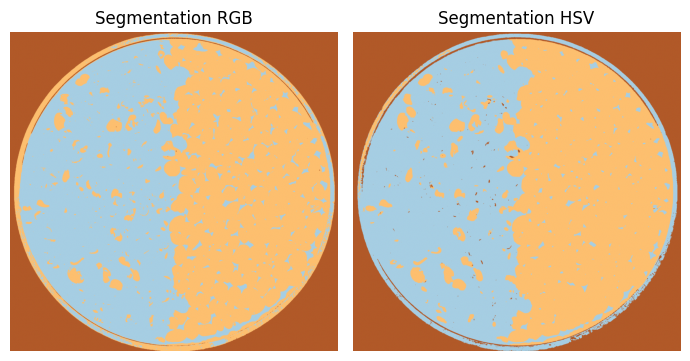

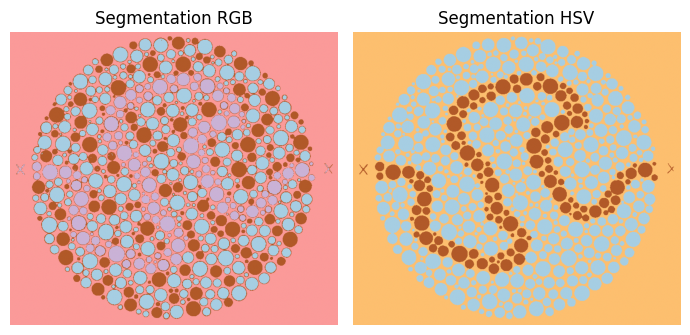

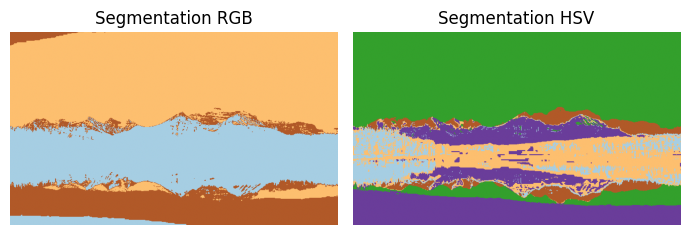

In [ ]:
for i in range(len(original_images)):
  _, axes = plt.subplots (1, 2, figsize = (7,4))
  axes[0].imshow(clustered_rgb_list[i], cmap="Paired"), axes[0].set_axis_off(), axes[0].set_title("Segmentation RGB")
  axes[1].imshow(clustered_hsv_list[i], cmap="Paired"), axes[1].set_axis_off(), axes[1].set_title("Segmentation HSV")
  plt.tight_layout()

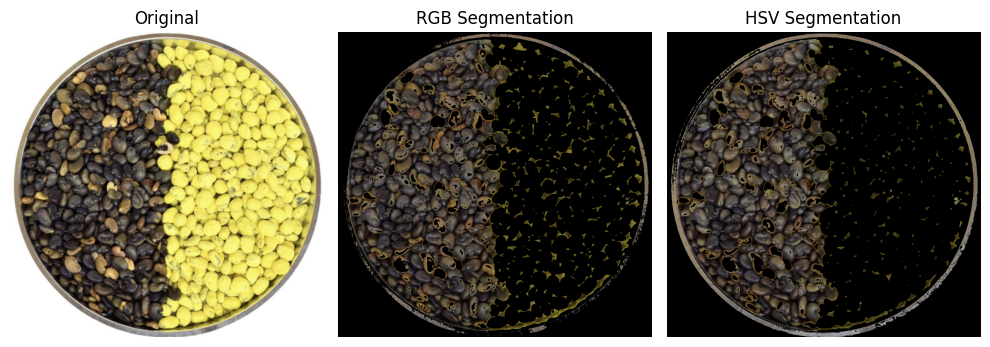

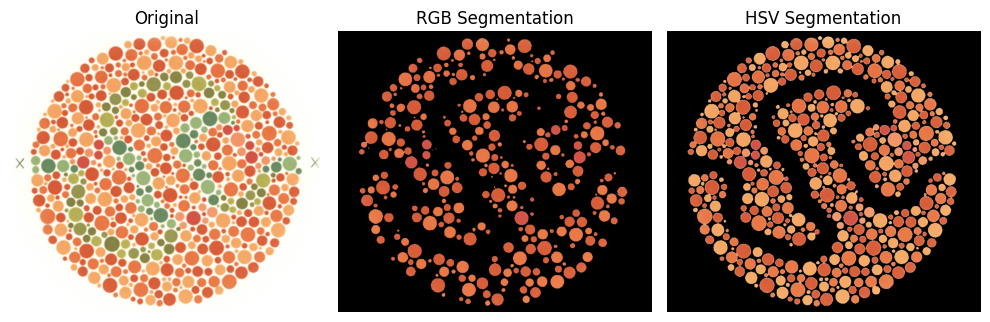

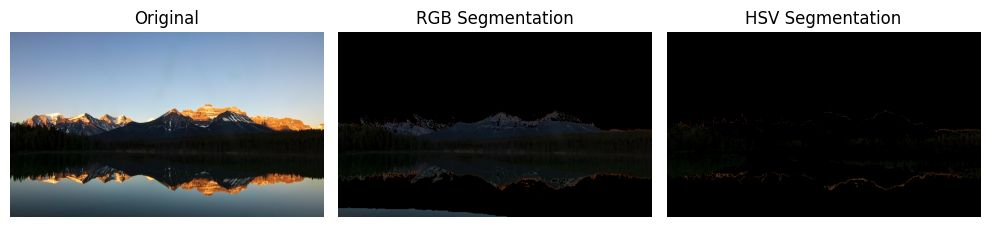

In [ ]:
for i in range(len(original_images)):
  # Mask clusters (turn the rest of pixels into black)

  cluster = 0
  cluster_mask_rgb = np.array ( clustered_rgb_list[i] == cluster , dtype = np.uint8)

  cluster = 0
  cluster_mask_hsv = np.array ( clustered_hsv_list[i] == cluster , dtype = np.uint8)

  masked_rgb = np.copy(images_RGB[i])
  masked_rgb = cv2.bitwise_and(masked_rgb, masked_rgb, mask = cluster_mask_rgb )

  masked_hsv = np.copy(images_RGB[i])
  masked_hsv = cv2.bitwise_and(masked_hsv, masked_hsv, mask = cluster_mask_hsv )

  _, axes = plt.subplots (1, 3, figsize = (10,4))
  axes[0].imshow(images_RGB[i]), axes[0].set_axis_off(), axes[0].set_title("Original")
  axes[1].imshow(masked_rgb), axes[1].set_axis_off(), axes[1].set_title("RGB Segmentation")
  axes[2].imshow(masked_hsv), axes[2].set_axis_off(), axes[2].set_title("HSV Segmentation")
  plt.tight_layout()

# **Elbow and Silhouette**

In [ ]:
def silhouette_score_def(clusters, vectorized):
  from sklearn.metrics import silhouette_score

  # Define num of clusters
  silhouette_distances = []

  # Eval kmeans over each num of clusters
  for cluster in clusters :
    kmeans = KMeans(n_clusters = cluster )
    kmeans.fit( vectorized )

    predictions = kmeans.predict( vectorized )
    distance = silhouette_score( vectorized , predictions , metric="euclidean")

    silhouette_distances.append(distance)
  return silhouette_distances

In [ ]:
# Create a distance function
def euclidean_distance(pt1, pt2):
  squared_diffs = [(a - b)**2 for a, b in zip(pt1, pt2)]
  return sum(squared_diffs)**0.5

In [ ]:
def elbow_distances_def(clusters, vectorized):
  # Define num of clusters
  elbow_distances = []

  # Eval kmeans over each num of clusters
  for cluster in clusters :
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit( vectorized )

    centroides = kmeans.cluster_centers_
    predictions = kmeans.predict( vectorized )
    distance = 0

    for i in range(len(vectorized)) :
      centroide = centroides[predictions[i]]
      distance += euclidean_distance( centroide , vectorized[i] )

    elbow_distances.append(distance/len(vectorized))
  return elbow_distances

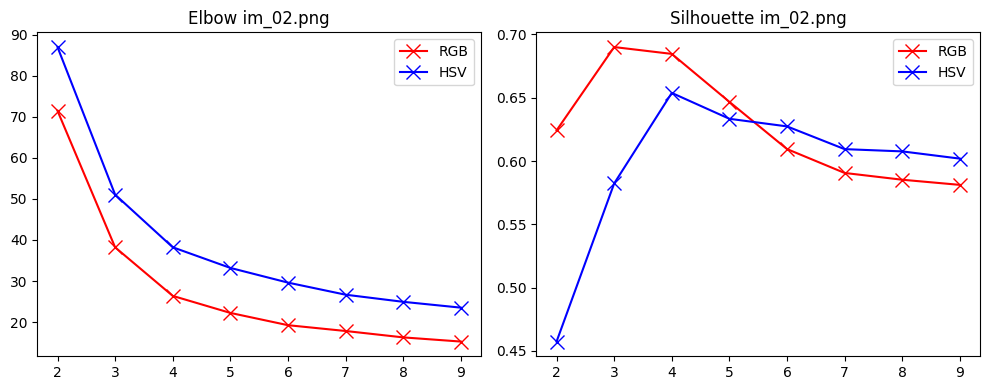

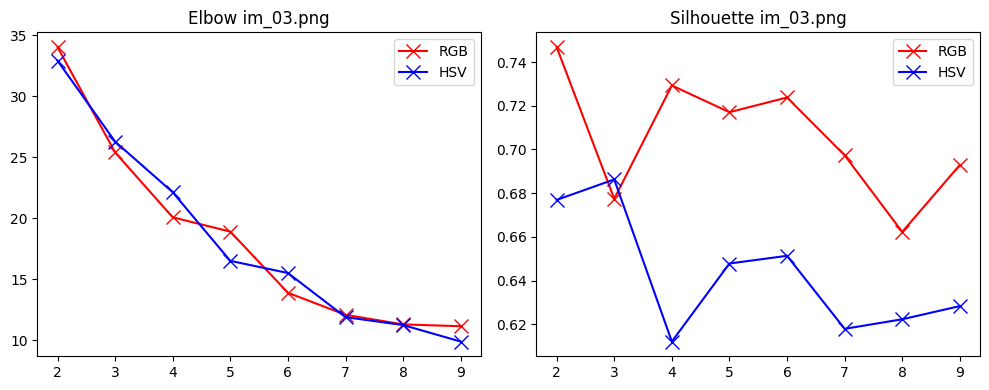

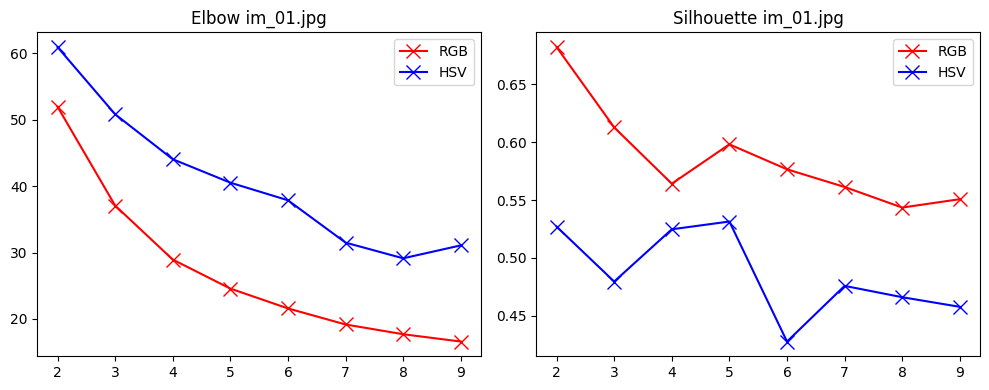

In [ ]:
# Plot the elbow
clusters = [ 2, 3, 4, 5, 6, 7, 8, 9 ]

for i in range(len(original_images)):
  _, axes = plt.subplots (1,2, figsize = (10,4))

  axes[0].plot( clusters, elbow_distances_def(clusters, vectorized_rgb[i]), c='r', marker="x", ms=10, label="RGB")
  axes[0].plot( clusters, elbow_distances_def(clusters, vectorized_hsv[i]), c='b', marker="x", ms = 10, label="HSV")
  axes[0].set_title("Elbow {0}".format(names[i])), axes[0].legend()

  axes[1].plot( clusters, silhouette_score_def(clusters, vectorized_rgb[i]), c='r', marker="x", ms = 10, label="RGB")
  axes[1].plot( clusters, silhouette_score_def(clusters, vectorized_hsv[i]), c ='b', marker="x", ms = 10, label="HSV")
  axes[1].set_title("Silhouette {0}".format(names[i])), axes[1].legend()

  plt.tight_layout()

## **Reto (extra - C=1.0)** :
Realice el mismo análisis del ejercicio 2 usando DBSCAN.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
X = pd.read_csv('/content/dataset/customer_segmentation.csv', delimiter= ";").values

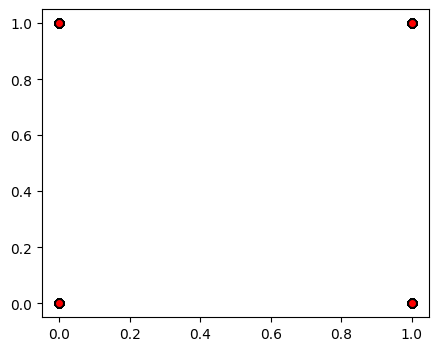

(1600, 7) (400, 7)


In [ ]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

_, ax = plt.subplots(figsize = (5,4))
ax.scatter(X_train[:,0], X_train[:,1], c='b', edgecolors='k')
ax.scatter(X_test[:,0], X_test[:,1], c='r', edgecolors='k')
_
plt.show()
print(X_train.shape, X_test.shape)

In [ ]:
dbscan = DBSCAN(eps= 0.1 , min_samples= 40 )

# Train DBSCAN
dbscan.fit(X_test)

DBSCAN(eps=0.1, min_samples=40)

In [ ]:
# Predictions
predictions = dbscan.labels_

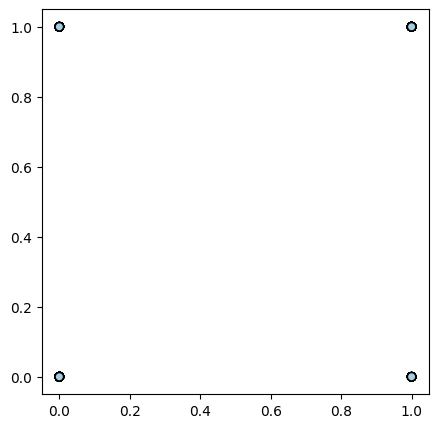

In [ ]:
_, ax = plt.subplots(figsize = (5,5))


ax.scatter(X_test[:,0], X_test[:,1] , c = predictions , edgecolors='k', cmap='Paired')